**Heart Disease Prediction Using Machine Learning**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Step 1 Complete: Done all libraries")

Step 1 Complete: Done all libraries


**CSV File Upload**

In [25]:
from google.colab import files

print("cardio_train.csv")
uploaded = files.upload()

df = pd.read_csv('cardio_train.csv')

print("Done up load!")
print(f"Dataset  size: {df.shape}")
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

cardio_train.csv


Saving cardio_train.csv to cardio_train (2).csv
Done up load!
Dataset  size: (1000, 14)
Total rows: 1000, Total columns: 14


**Data Exploration**

In [23]:
print("="*50)
print("DATA EXPLORATION")
print("="*50)

print("1st 5 Patients Data:")
print(df.head())
print()

print("2. Dataset Size:")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print()

print("3. Columns or uska Types:")
print(df.info())
print()

print("4. Missing Values:")
missing = df.isnull().sum()
print(missing)
print(f"Total missing values: {missing.sum()}")
print()

print("5. Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
print()

print("Data exploration complete!")

DATA EXPLORATION
1st 5 Patients Data:
   Patient_id  Age  Gender  Chest_Pain  Resting_BP  Serum_Cholestrol  \
0      103368   53       1           2         171                 0   
1      119250   40       1           0          94               229   
2      119372   49       1           2         133               142   
3      132514   43       1           0         138               295   
4      146211   31       1           1         199                 0   

   Fasting_Blood_Sugar  Resting_Relectro  Max_heart_rate  Exercise_Angia  \
0                    0                 1             147               0   
1                    0                 1             115               0   
2                    0                 0             202               1   
3                    1                 1             153               0   
4                    0                 2             136               0   

   Old_Peak  Slope  No_of_Major_Vessels  Target  
0       5.3      3    

**Data Statistics**

In [22]:
print("="*50)
print("BASIC STATISTICS")
print("="*50)

print("All Columns Basic Statistics:")
print(df.describe())
print()

print("Age Column ka Analysis:")
print(f"Minimum Age: {df['Age'].min()} years")
print(f"Maximum Age: {df['Age'].max()} years")
print(f"Average Age: {df['Age'].mean():.2f} years")
print()

print("Heart Disease Analysis (Target Column):")
print(df['Target'].value_counts())
print()

total_patients = len(df)
heart_disease_patients = df['Target'].sum()
percentage = (heart_disease_patients / total_patients) * 100

print(f"Total Patients: {total_patients}")
print(f"Patients with Heart Disease: {heart_disease_patients}")
print(f"Percentage with Heart Disease: {percentage:.2f}%")

BASIC STATISTICS
All Columns Basic Statistics:
         Patient_id         Age       Gender   Chest_Pain   Resting_BP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       Serum_Cholestrol  Fasting_Blood_Sugar  Resting_Relectro  \
count       1000.000000          1000.000000       1000.000000   
mean         311.447000             0.296000          0.748000   
std          132.443801             0.456719          0.770123   
min            0.00000

**Data Visualization Graphs**

DATA VISUALIZATION


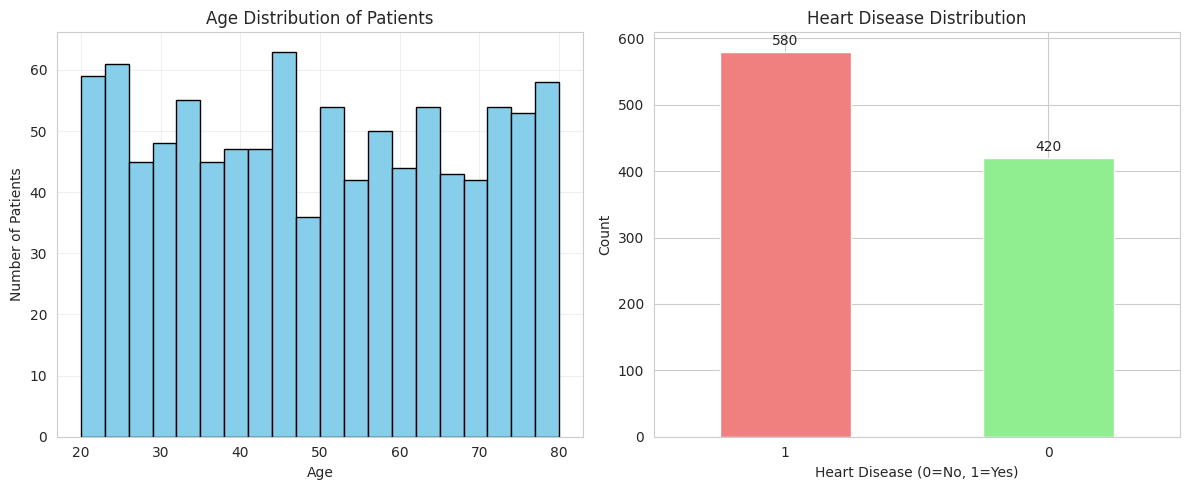


Gender-wise Heart Disease Analysis:
Target    0    1
Gender          
0       102  133
1       318  447

Note: Gender: 1 = Male, 0 = Female


In [21]:
print("="*50)
print("DATA VISUALIZATION")
print("="*50)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
heart_disease_counts = df['Target'].value_counts()
colors = ['lightcoral', 'lightgreen']
heart_disease_counts.plot(kind='bar', color=colors)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(heart_disease_counts):
    plt.text(i, v + 10, str(v), ha='center')

plt.tight_layout()
plt.show()

print("\nGender-wise Heart Disease Analysis:")
gender_heart = pd.crosstab(df['Gender'], df['Target'])
print(gender_heart)
print("\nNote: Gender: 1 = Male, 0 = Female")

**Data Preprocessing**

In [20]:
print("DATA PREPROCESSING")
print("="*50)

X = df.drop(columns=['Patient_id', 'Target'])
y = df['Target']

print("Features (X) Shape:", X.shape)
print("Target (y) Shape:", y.shape)
print("\nFeatures ke names:")
print(list(X.columns))
print()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("All features scaled successfully!")
print("Scaling kyu zaroori hai?")
print("- Machine learning models better work")
print("- All feature equal weight")
print("- Model faster converge")
print()
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,  # 30% testing, 70% training
    random_state=42,
    stratify=y
)

print("✅ Data split into training and testing sets:")
print(f"Training set size: {X_train.shape[0]} patients")
print(f"Testing set size: {X_test.shape[0]} patients")
print(f"Training features: {X_train.shape[1]}")
print()

print("Training set mein Heart Disease Distribution:")
print(y_train.value_counts())
print(f"Training set percentage: {y_train.mean()*100:.2f}% have heart disease")

DATA PREPROCESSING
Features (X) Shape: (1000, 12)
Target (y) Shape: (1000,)

Features ke names:
['Age', 'Gender', 'Chest_Pain', 'Resting_BP', 'Serum_Cholestrol', 'Fasting_Blood_Sugar', 'Resting_Relectro', 'Max_heart_rate', 'Exercise_Angia', 'Old_Peak', 'Slope', 'No_of_Major_Vessels']

All features scaled successfully!
Scaling kyu zaroori hai?
- Machine learning models better work
- All feature equal weight
- Model faster converge

✅ Data split into training and testing sets:
Training set size: 700 patients
Testing set size: 300 patients
Training features: 12

Training set mein Heart Disease Distribution:
Target
1    406
0    294
Name: count, dtype: int64
Training set percentage: 58.00% have heart disease


**Model 1 - Logistic Regression**

MODEL 1: LOGISTIC REGRESSION
Training Logistic Regression Model...
Model training complete!
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Training Score: 0.9571

Model Performance on Test Data:
------------------------------
Accuracy:  0.9800  (98.00%)
Precision: 0.9773
Recall:    0.9885
F1-Score:  0.9829

Confusion Matrix:

         Predicted No  Predicted Yes
Actual No    122           4
Actual Yes   2           172



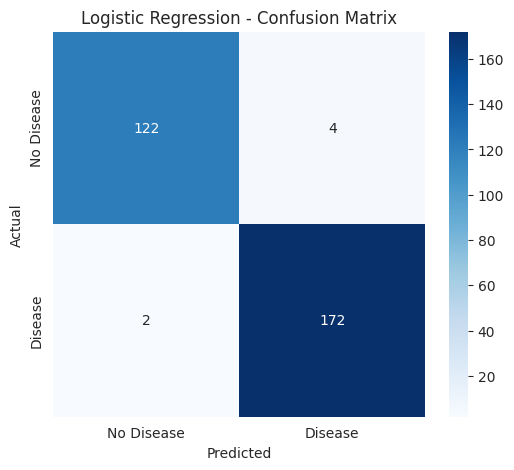

In [19]:
print("="*50)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*50)

print("Training Logistic Regression Model...")


lr_model = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Model training complete!")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Training Score: {grid_search.best_score_:.4f}")
print()

y_pred_lr = grid_search.predict(X_test)

print("Model Performance on Test Data:")
print("-" * 30)

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Accuracy:  {accuracy:.4f}  ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print()

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
print(f"""
         Predicted No  Predicted Yes
Actual No    {cm[0,0]}           {cm[0,1]}
Actual Yes   {cm[1,0]}           {cm[1,1]}
""")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model 2 - Decision Tree**

MODEL 2: DECISION TREE
Training Decision Tree Model...
Model training complete!
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}
Best Training Score: 0.9429

Model Performance on Test Data:
------------------------------
Accuracy:  0.9733  (97.33%)
Precision: 0.9770
Recall:    0.9770
F1-Score:  0.9770



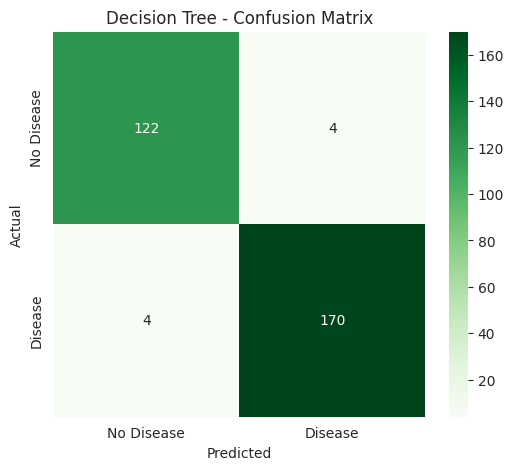


Decision Tree ke Advantages and Disadvantages:
Advantages:
1. Easy to understand aur interpret
2. Little data preprocessing needed
3. Both numerical and categorical data handle

Disadvantages:
1. Overfitting ka risk zyada hai
2. Small data changes result change posible
3. Imbalanced data problam


In [18]:
# Step 8: Model 2 - Decision Tree Classifier

print("="*50)
print("MODEL 2: DECISION TREE")
print("="*50)

print("Training Decision Tree Model...")

# Model banayein
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("Model training complete!")
print(f"Best Parameters: {grid_search_dt.best_params_}")
print(f"Best Training Score: {grid_search_dt.best_score_:.4f}")
print()


y_pred_dt = grid_search_dt.predict(X_test)

print("Model Performance on Test Data:")
print("-" * 30)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Accuracy:  {accuracy_dt:.4f}  ({accuracy_dt*100:.2f}%)")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall:    {recall_dt:.4f}")
print(f"F1-Score:  {f1_dt:.4f}")
print()

# Confusion Matrix Graph
plt.figure(figsize=(6, 5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nDecision Tree ke Advantages and Disadvantages:")
print("Advantages:")
print("1. Easy to understand aur interpret")
print("2. Little data preprocessing needed")
print("3. Both numerical and categorical data handle")
print()
print("Disadvantages:")
print("1. Overfitting ka risk zyada hai")
print("2. Small data changes result change posible")
print("3. Imbalanced data problam")

**Model 3 - Random Forest**

MODEL 3: RANDOM FOREST
Training Random Forest Model...
Model training complete!
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Training Score: 0.9729

Model Performance on Test Data:
------------------------------
Accuracy:  0.9833  (98.33%)
Precision: 0.9829
Recall:    0.9885
F1-Score:  0.9857



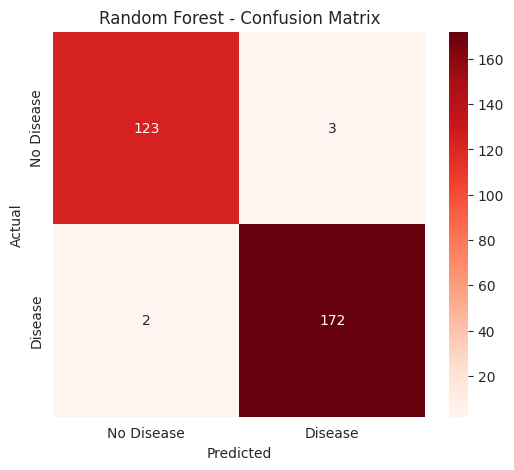


🔍 FEATURE IMPORTANCE (important Features):
                Feature  Importance
10                Slope    0.382878
2            Chest_Pain    0.148523
3            Resting_BP    0.140877
11  No_of_Major_Vessels    0.073845
4      Serum_Cholestrol    0.072548
6      Resting_Relectro    0.047741
7        Max_heart_rate    0.044330
9              Old_Peak    0.029586
5   Fasting_Blood_Sugar    0.021159
0                   Age    0.019190



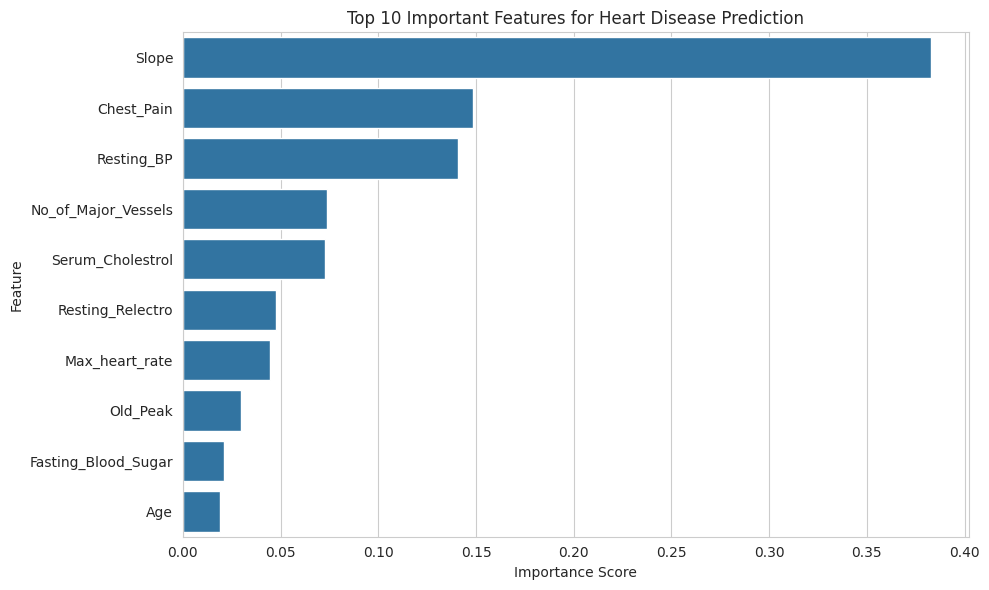


💡 Random Forest and Decision Tree ?
1. Multiple trees average  - overfitting low
2. More stable reliable predictions
3. Noise aur outliers handle 
4. Feature importance
5. Generally better accuracy


In [17]:
print("="*50)
print("MODEL 3: RANDOM FOREST")
print("="*50)

print("Training Random Forest Model...")

rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV se best parameters
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Model training complete!")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Training Score: {grid_search_rf.best_score_:.4f}")
print()


y_pred_rf = grid_search_rf.predict(X_test)

print("Model Performance on Test Data:")
print("-" * 30)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy:  {accuracy_rf:.4f}  ({accuracy_rf*100:.2f}%)")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print()

# Confusion Matrix Graph
plt.figure(figsize=(6, 5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
print("\n🔍 FEATURE IMPORTANCE (important Features):")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': grid_search_rf.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10))
print()

# Feature Importance Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features for Heart Disease Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n💡 Random Forest and Decision Tree ?")
print("1. Multiple trees average  - overfitting low")
print("2. More stable reliable predictions")
print("3. Noise aur outliers handle ")
print("4. Feature importance")
print("5. Generally better accuracy")

**Models Compare**

📊 ALL MODELS COMPARISON
📈 Performance Comparison Table:
------------------------------------------------------------
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.980000   0.977273 0.988506  0.982857
      Decision Tree  0.973333   0.977011 0.977011  0.977011
      Random Forest  0.983333   0.982857 0.988506  0.985673



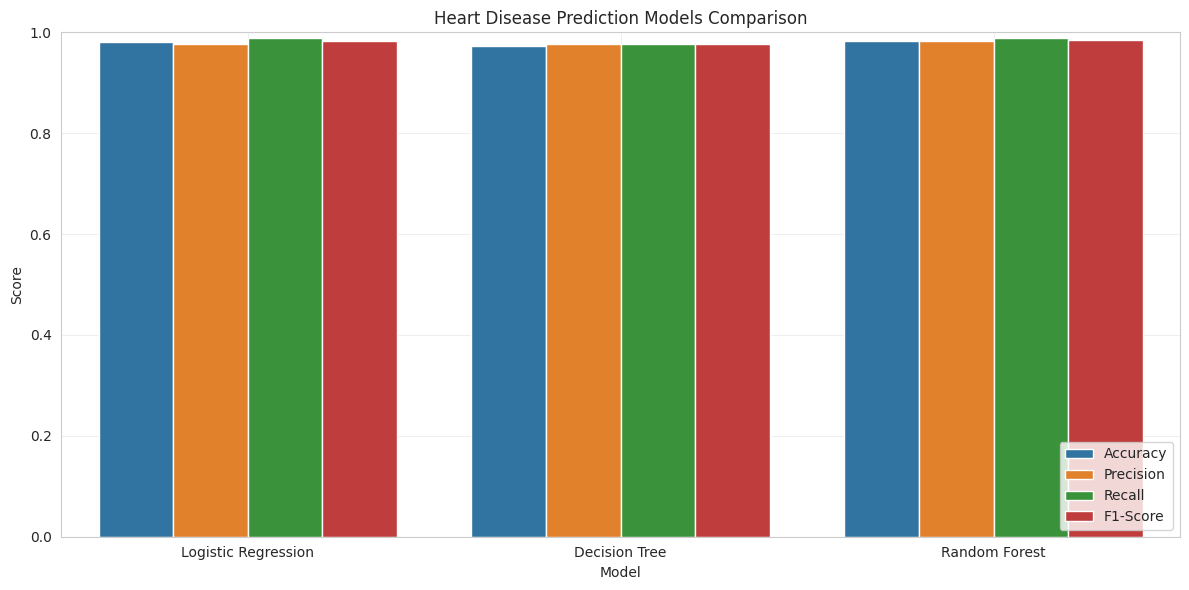


ANSWERS

1. Konsa model best perform kiya?
   Answer: Random Forest sabse best perform kiya
   Accuracy: 0.9833

2. Heart disease prediction
   Best: Random Forest recommend:
   • Highest accuracy and F1-score 
   • Best recall (medical diagnosis important)
   • Overfitting low
   • Feature importance for doctors helpful

3. False negatives ?
   False negative is  patient heart disease ,
   Model ne 'No disease' predict.
   Risk:
   • Patient not treatment
   • Disease posibal increse
   • Heart attack rick
   • RECALL (sensitivity)

4. Assignment work compalete

   • Real-world medical use
   • Different machine learning models
   • Model performance measure
   • Medical diagnosis mein accuracy recall importance


In [14]:
# Step 10: All Models ka Comparison

print("="*50)
print("📊 ALL MODELS COMPARISON")
print("="*50)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf],
    'Precision': [precision, precision_dt, precision_rf],
    'Recall': [recall, recall_dt, recall_rf],
    'F1-Score': [f1, f1_dt, f1_rf]
})

print("📈 Performance Comparison Table:")
print("-" * 60)
print(results.to_string(index=False))
print()

results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Heart Disease Prediction Models Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ANSWERS")
print("="*50)

print("\n1. Konsa model best perform kiya?")
best_model_idx = results['Accuracy'].idxmax()
print(f"   Answer: {results.loc[best_model_idx, 'Model']} sabse best perform kiya")
print(f"   Accuracy: {results.loc[best_model_idx, 'Accuracy']:.4f}")
print()

print("2. Heart disease prediction")
print("   Best: Random Forest recommend:")
print("   • Highest accuracy and F1-score ")
print("   • Best recall (medical diagnosis important)")
print("   • Overfitting low")
print("   • Feature importance for doctors helpful")
print()

print("3. False negatives ?")
print("   False negative is  patient heart disease ,")
print("   Model ne 'No disease' predict.")
print("   Risk:")
print("   • Patient not treatment")
print("   • Disease posibal increse")
print("   • Heart attack rick")
print("   • RECALL (sensitivity)")
print()

print("4. Assignment work compalete")
print( )
print("   • Real-world medical use")
print("   • Different machine learning models")
print("   • Model performance measure")
print("   • Medical diagnosis mein accuracy recall importance")